In [2]:
# import necessary packages
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [32]:
surface_file = '../derivatives/surface_areas_2022-02-27.csv'
surface_df = pd.read_csv(surface_file)
surface_df = surface_df.drop(columns=['message'])
surface_df.head(5)

,hV4,VO2,VO1,cortex,rater,sid,hemisphere
0,781.737434,303.489328,100.468879,107230.953125,BrendaQiu,100610,lh
1,653.491056,359.608152,113.126526,108015.562500,BrendaQiu,100610,rh
2,584.953536,333.010054,183.841560,99291.320312,BrendaQiu,102311,lh
3,808.426349,276.758045,427.680084,100608.046875,BrendaQiu,102311,rh
4,961.528820,215.701942,392.237191,91761.718750,BrendaQiu,102816,lh


In [116]:
def calculate_percent(roi, cortex):
    return roi*100/cortex

In [45]:
long_surface_df = pd.melt(surface_df, id_vars=['rater','sid','hemisphere','cortex'], value_vars=['hV4','VO2','VO1'], var_name='roi', value_name='surface_area')

In [46]:
long_surface_df.head()

,rater,sid,hemisphere,cortex,roi,surface_area
0,BrendaQiu,100610.0,lh,107230.953125,hV4,781.737434
1,BrendaQiu,100610.0,rh,108015.562500,hV4,653.491056
2,BrendaQiu,102311.0,lh,99291.320312,hV4,584.953536
3,BrendaQiu,102311.0,rh,100608.046875,hV4,808.426349
4,BrendaQiu,102816.0,lh,91761.718750,hV4,961.528820


In [51]:
long_surface_df['p_surface_area'] = long_surface_df.apply(lambda x: calculate_percent(roi=x.surface_area, cortex=x.cortex), axis=1)

In [79]:
long_surface_df = long_surface_df.dropna()
long_surface_df = long_surface_df.query('rater != "mean"')

In [115]:
long_surface_df.query('sid == 100610 & roi == "hV4"')

,rater,sid,hemisphere,cortex,roi,surface_area,p_surface_area
0,BrendaQiu,100610.0,lh,107230.953125,hV4,781.737434,0.729022
1,BrendaQiu,100610.0,rh,108015.562500,hV4,653.491056,0.604997
362,bogengsong,100610.0,lh,107230.953125,hV4,754.363699,0.703494
363,bogengsong,100610.0,rh,108015.562500,hV4,654.180812,0.605636
724,JiyeongHa,100610.0,lh,107230.953125,hV4,811.905871,0.757156
725,JiyeongHa,100610.0,rh,108015.562500,hV4,755.964210,0.699866
1086,lindazelinzhao,100610.0,lh,107230.953125,hV4,768.647748,0.716815
1087,lindazelinzhao,100610.0,rh,108015.562500,hV4,817.357322,0.756703
1448,nourahboujaber,100610.0,lh,107230.953125,hV4,207.842733,0.193827
1449,nourahboujaber,100610.0,rh,108015.562500,hV4,477.484318,0.442051


In [302]:
def plot_surface_area(df, hue='hemisphere', percentage=True):
    if percentage is True:
        y = 'p_surface_area'
    else:
        y = 'surface_area' 
    sns.set(style={'axes.facecolor':'white', 'font.family':'Helvetica'}, rc={'figure.figsize':(8,5), 'axes.labelpad': 20}, font_scale=1.5)
    grid = sns.violinplot(data=long_surface_df, x="roi", y=y, 
                          order=['hV4', 'VO1', 'VO2'], 
                          hue='hemisphere', split=(hue!=None), 
                          orient="v", linewidth=2, dodge=True, bw=.15, palette='Reds', height=10)
    grid.set_ylabel(ylabel="Surface Area (%)", labelpad=25)
    grid.set_xlabel(xlabel="", labelpad=25)
    grid.tick_params(bottom=False)
    sns.despine(top=True, bottom=True, right=True)
    lgd = grid.legend(title='Hemisphere', loc='upper left', bbox_to_anchor=(0.99, 1.05))
    lgd.get_frame().set_edgecolor('none')
    return grid


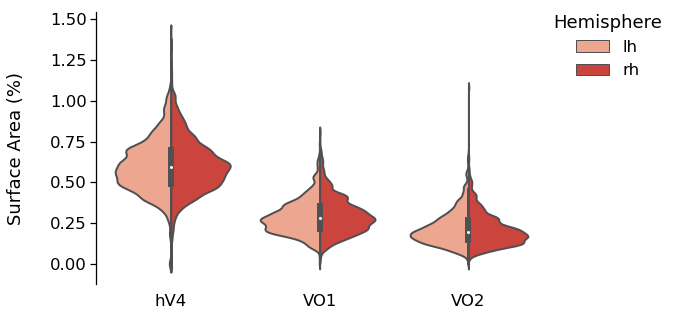

In [303]:
ax = plot_surface_area(long_surface_df);

In [355]:
df = df.explode('p_surface_area')
df['p_surface_area'] = df['p_surface_area'].astype('float')
def plot_surface_area_columns(df, hue='hemisphere', percentage=True):
    df['dummy'] = 0

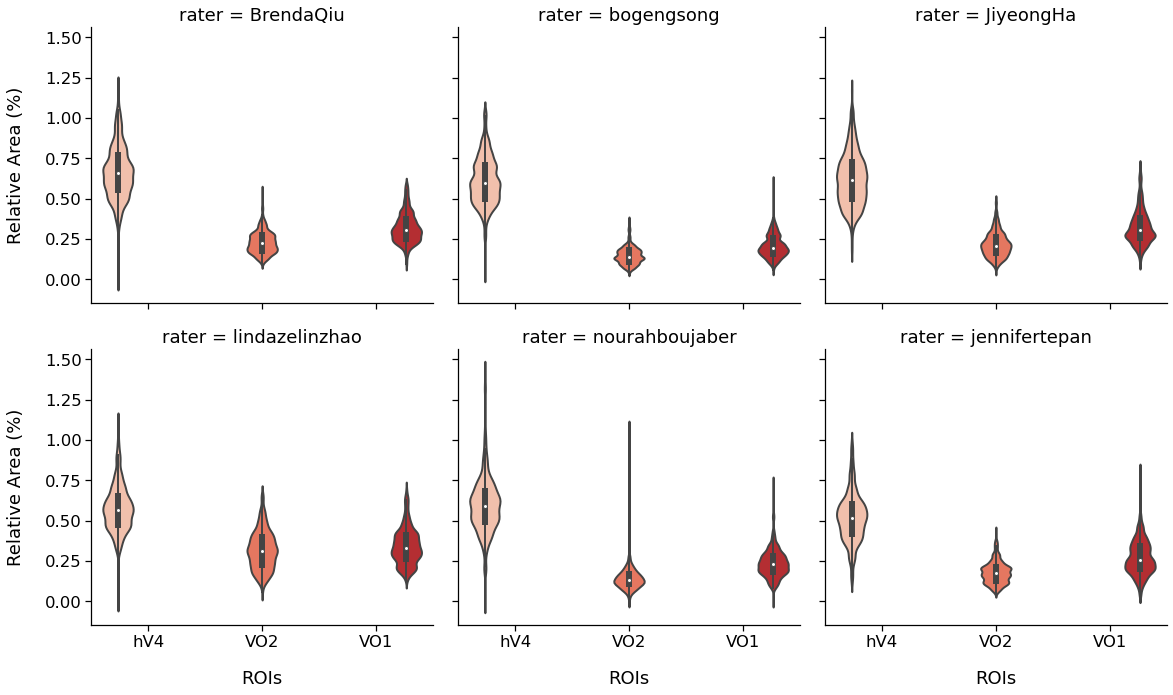

In [398]:

grid = sns.catplot(data=df, x='roi', y='p_surface_area', kind='violin', 
                   hue='roi', col="rater", col_wrap=3, linewidth=2,
                   orient="v", height=5, aspect=1.1, palette="Reds", inner='box',
                   dodge=True, bw=.2, sharey=True)
grid.set_axis_labels('ROIs', 'Relative Area (%)')
# for ax in grid.fig.axes:
#     ax.set_xticklabels('')
#     ax.set_xlabel('')
#     ax.tick_params(bottom=False)
#     for tick in ax.get_xticklabels():
#         tick.set_visible(False)


In [380]:
ax.get_xlabel()

'dummy'